In [2]:
%pylab inline
from sklearn import \
    datasets, \
    linear_model, \
    cross_validation, \
    preprocessing, \
    svm

import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

Populating the interactive namespace from numpy and matplotlib


In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
train = df_train.as_matrix()
test = df_test.as_matrix()

X_train = train[:,1:]
Y_train = train[:, 0]
X_test = test[:, 1:]
Y_test = test[:, 0]

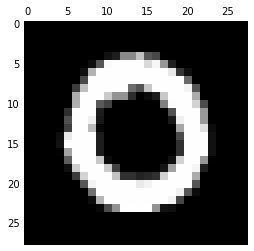

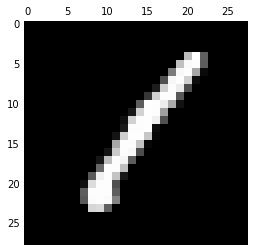

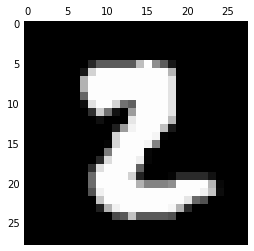

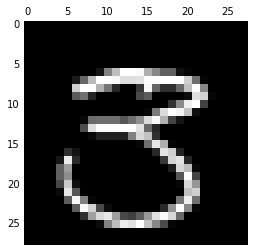

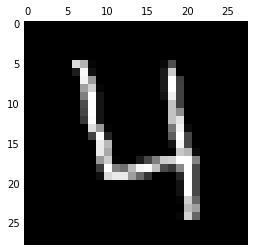

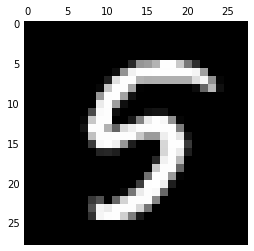

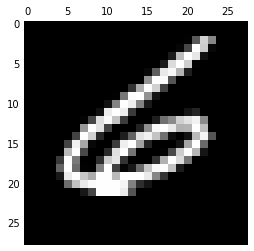

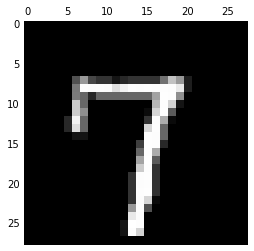

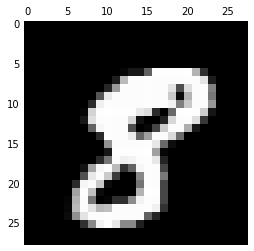

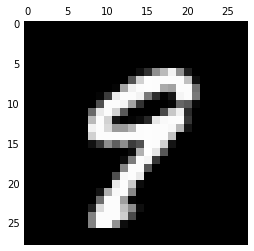

In [4]:
samples = np.empty([10,784])
for i in range(0,10):
    for j in range(0,len(Y_train)):
        if Y_train[j] == i:
            matshow(X_train[j].reshape(28,28), cmap='gray') 
            samples[i] = X_train[j]
            break

(array([ 0.10931217,  0.12391534,  0.11050265,  0.11510582,  0.10772487,
         0.10039683,  0.10944444,  0.11642857,  0.10748677,  0.11079365]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

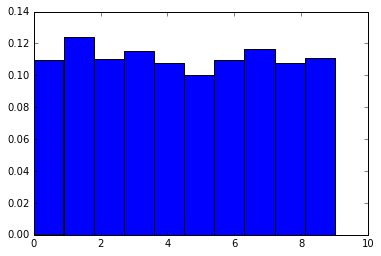

In [5]:
hist(Y_train, normed=True)

In [35]:
#"Sample Digits" are in sample_digits

# find distance with all digits 
dist_min = np.empty([2,10]) # nearest neighbour distance[0,:] and its index[1,:]

x1 = X_train[:100,:]
pairwise_distances = euclidean_distances(samples, X_train)
print pairwise_distances.shape

(10L, 42000L)


In [107]:
minval = numpy.ma.masked_equal(pairwise_distances, 0.0, copy=False)
dist_min[0,:] = minval.min(1) 

for i in range(0,10):
    dist_min[1,i] = nonzero(min_distances[i] == pairwise_distances)[1][0]
    
print dist_min

[[  1046.59543282    489.67948701   1380.8772574    1832.66499939
    1356.88098225   1066.36766643   1446.51132038    863.50101332
    1593.777588      910.57674031]
 [ 12950.          29704.           9536.           8981.          14787.
   30073.          16240.          15275.          32586.          35742.        ]]


Closest matches to the first ones follow it for comparison


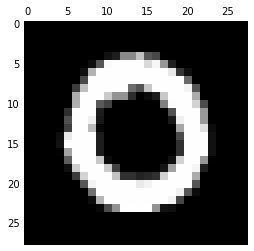

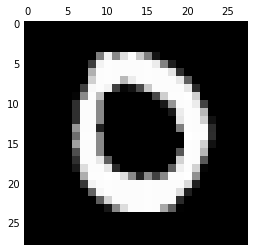

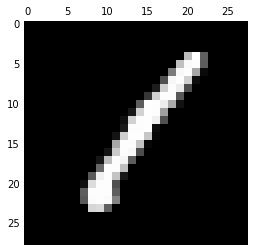

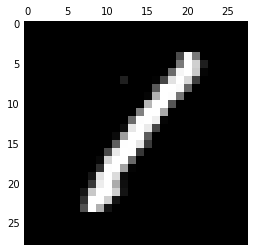

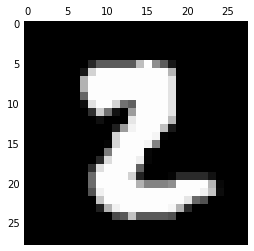

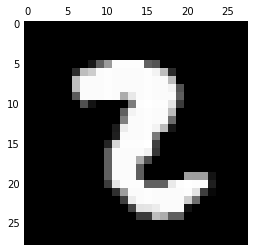

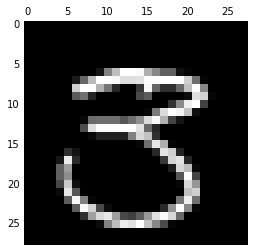

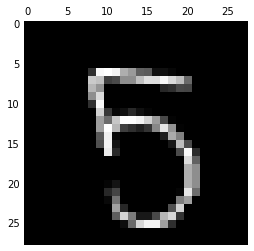

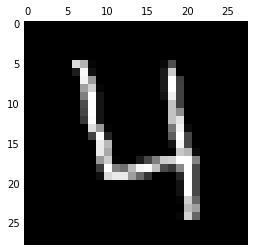

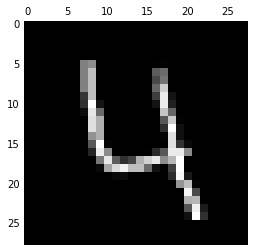

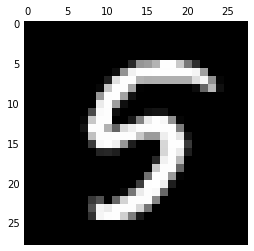

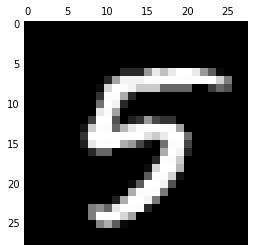

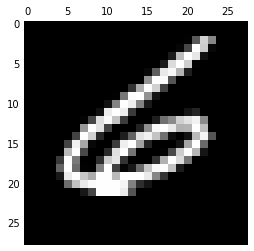

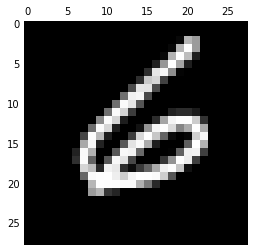

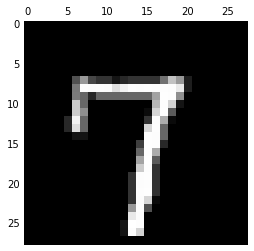

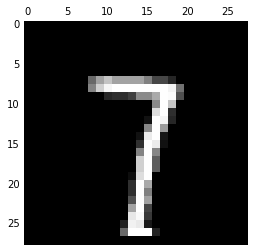

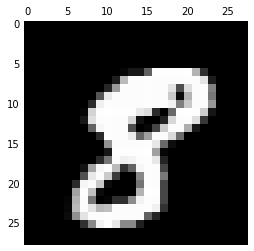

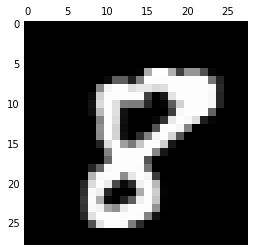

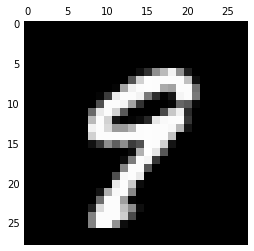

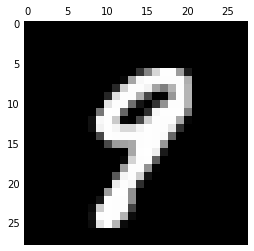

In [113]:
Y_withAsterix = train[:, 0]

print "Closest matches to the first ones follow it for comparison"

for i in range(0,10):
    matshow(samples[i].reshape(28,28), cmap='gray')
    matshow(X_train[int(dist_min[1,i])].reshape(28,28), cmap='gray') 
    # check labels of the closest neighbours
    #if Y_train[dist_min[1,i]] != i:
        # erroneous samples
        #Y_withAsterix[dist_min[1,i]] = Y_withAsterix[dist_min[1,i]] + '*'
        #print Y_withAsterix[dist_min[1,i]]

In [114]:
# why should the samples be marked with a * even though the labels are correct ?
# genuine and imposter matches for 0 and 1

In [14]:
cls = linear_model.LogisticRegression()
cls.fit(X,Y)
# don't train with all the samples !! :D

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
cls.score?

In [18]:
cls.score(X,Y)

0.99332220367278801

In [21]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,Y)

In [24]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [28]:
cls1 = linear_model.LogisticRegression()
cls1.fit(X_train,Y_train)
cls1.score(X_test,Y_test)

0.95777777777777773

((array([ 178.,  182.,  177.,  183.,  181.,  182.,  181.,  179.,  174.,  180.]),
  array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
  <a list of 10 Patch objects>),
 (array([ 142.,  122.,  131.,  145.,  132.,  129.,  138.,  148.,  127.,  133.]),
  array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
  <a list of 10 Patch objects>),
 (array([ 36.,  60.,  46.,  38.,  49.,  53.,  43.,  31.,  47.,  47.]),
  array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
  <a list of 10 Patch objects>))

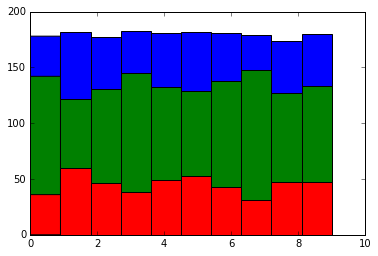

In [31]:
hist(Y), hist(Y_train), hist(Y_test)

In [33]:
W = cls1.coef_
B = cls1.intercept_

In [36]:
W.shape

(10, 64)

In [39]:
X_test.dot(W.T).shape

(450, 10)

In [42]:
X_test.dot(W.T) + B

array([[-28.11251274,  -4.75385344, -44.05795735, ...,  -4.27164084,
        -21.4146163 , -34.26012728],
       [-22.55636376, -25.36950475,  12.09982268, ..., -21.08046899,
        -16.97721396, -24.72102411],
       [-11.89764273, -28.87771846, -13.38598519, ..., -30.42510881,
         -4.84942391, -44.87118577],
       ..., 
       [ -6.85557217, -17.82205969, -12.89370473, ...,  10.0648473 ,
        -10.78594221,  -4.63946814],
       [-13.50855948,  -7.24488703, -32.81700359, ..., -14.51397334,
        -17.69472766, -28.89471933],
       [-29.78643555,  -1.11997782, -20.5620402 , ..., -17.70884022,
         -2.80666616, -19.66110548]])

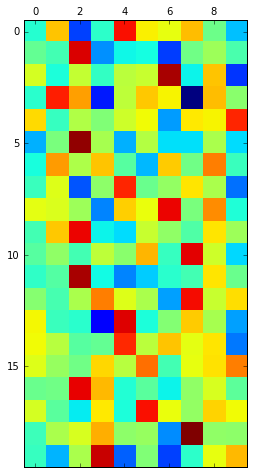

In [44]:
matshow((X_test.dot(W.T) + B)[:20])

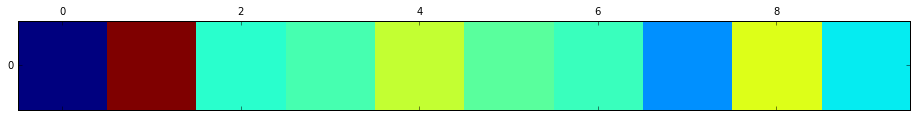

In [57]:
matshow((X[1].dot(W.T) + B, )[:20])

In [58]:
Y[1]

1

In [52]:
np.argmax(X_test.dot(W.T) + B, axis=1) == Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [59]:
# accuracy = calc True values OR score function
(np.argmax(X_test.dot(W.T) + B, axis=1) == Y_test).sum() / float(len(Y_test))

0.95777777777777773

In [61]:
cls.predict_proba(X_test)

array([[  6.04256957e-13,   8.35663826e-03,   7.18129980e-20, ...,
          1.34635763e-02,   4.89870317e-10,   1.29225014e-15],
       [  1.59918270e-10,   9.59768462e-12,   9.99999957e-01, ...,
          6.99634211e-10,   4.23537665e-08,   1.83568448e-11],
       [  6.75382117e-06,   2.85232704e-13,   1.52465972e-06, ...,
          6.06982584e-14,   7.71199121e-03,   3.23090896e-20],
       ..., 
       [  1.04141438e-03,   1.80051135e-08,   2.48743729e-06, ...,
          9.89463029e-01,   2.04707561e-05,   9.46991908e-03],
       [  1.35830131e-06,   7.12795905e-04,   5.59043987e-15, ...,
          4.96993608e-07,   2.06522304e-08,   2.82405007e-13],
       [  3.82384977e-13,   8.11984433e-01,   3.87797333e-09, ...,
          6.72564309e-08,   1.88015475e-01,   9.54719505e-09]])

In [66]:
cls.predict_proba(X_test).sum(axis=1) # each row adds up to 1

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [68]:
(X_test.dot(W.T)).shape

(450, 10)

In [70]:
B.shape 

(10,)

In [72]:
# so how does numpy add these two above matrices ?? it takes care of it internally :) by adding B 450 times

In [76]:
cls2 = svm.SVC()
cls2.fit(X_train,Y_train)
cls2.score(X_test,Y_test)

0.36888888888888888

In [78]:
# normalization the mean of each column should be almost 0
X_train.mean(axis=0)

array([  0.00000000e+00,   3.25167038e-01,   5.20935412e+00,
         1.19317001e+01,   1.18277654e+01,   5.75872309e+00,
         1.42019302e+00,   1.52932442e-01,   5.19673348e-03,
         2.00371195e+00,   1.04580549e+01,   1.19784707e+01,
         1.02538976e+01,   8.23756496e+00,   1.93318486e+00,
         1.23236823e-01,   0.00000000e+00,   2.57906459e+00,
         9.86191537e+00,   6.86265776e+00,   7.04083148e+00,
         7.86636971e+00,   1.86265776e+00,   5.93912398e-02,
         7.42390497e-04,   2.45508537e+00,   9.03637713e+00,
         8.69413512e+00,   9.89086860e+00,   7.66443950e+00,
         2.43281366e+00,   2.96956199e-03,   0.00000000e+00,
         2.35783222e+00,   7.71714922e+00,   9.11581292e+00,
         1.02976986e+01,   8.81737194e+00,   2.97401633e+00,
         0.00000000e+00,   8.90868597e-03,   1.54491463e+00,
         6.95174462e+00,   7.24201930e+00,   7.56124722e+00,
         8.24127691e+00,   3.52264291e+00,   2.37564959e-02,
         9.65107647e-03,

In [79]:
X_train.std(axis=0) # standard deviation

array([ 0.        ,  0.94290491,  4.71559057,  4.21980662,  4.31723137,
        5.66856065,  3.4585434 ,  1.10626746,  0.09021801,  3.22584467,
        5.31714182,  3.9646148 ,  4.8117623 ,  6.02986746,  3.72833874,
        0.88186492,  0.        ,  3.53057802,  5.75084747,  5.73981728,
        6.16734908,  6.14354077,  3.34011097,  0.47914851,  0.02723673,
        3.1372978 ,  6.22357622,  5.85952759,  6.19366715,  5.91139266,
        3.71584117,  0.05441272,  0.        ,  3.48690677,  6.35238609,
        6.2633337 ,  5.90229926,  5.86491547,  3.54356602,  0.        ,
        0.15387375,  2.92824768,  6.51364073,  6.43343517,  6.18531543,
        5.71096609,  4.35915947,  0.2714308 ,  0.23576714,  1.82418926,
        5.66436107,  5.24135504,  5.32585686,  6.05221176,  4.87193276,
        0.97112736,  0.02723673,  0.97451472,  5.09972377,  4.35067498,
        5.029768  ,  5.87036647,  3.96009644,  1.74406916])

In [80]:
cls3 = svm.SVC(C=10) # C= 100, 1000, 0.1, 0.01 or no argument
# C is the intercept..else C =0 and the plane passes through the Origin

pre = preprocessing.StandardScaler() # X' = (X - X_mean)/ sigma
pre.fit(X_train)

cls3.fit(pre.transform(X_train),Y_train)
cls3.score(pre.transform(X_test),Y_test) # if you transform training, then transform test data

0.97999999999999998

In [82]:
pre.transform(X_train).std(axis=0)

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [85]:
for fold in cross_validation.KFold(len(X), n_folds=10):
    train, test = fold
    print "This folds:", list(train)

This folds: [180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 37

In [90]:
accuracies = []
for fold in (cross_validation.KFold(len(X), n_folds=100)):
    train, test = fold
    score = linear_model.LogisticRegression().fit(X[train], Y[train]).score
    print "score:", score
    accuracies.append(score)
    
print np.mean(accuracies)

score: <bound method LogisticRegression.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>
score: <bound method LogisticRegression.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>
score: <bound method LogisticRegression.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>
score: <bound method LogisticRegression.score of Logist

TypeError: unsupported operand type(s) for +: 'instancemethod' and 'instancemethod'

In [91]:
for cls [Linear Regression, SVM]:
    for parameter in [1.0, 10.0, 100,]:
        accuracies = []
        for fold in (cross_validation.KFold(len(X), n_folds=100)):
            train, test = fold
            score = linear_model.LogisticRegression().fit(X[train], Y[train]).score
            print "score:", score
            accuracies.append(score)
    print np.mean(accuracies)

SyntaxError: invalid syntax (<ipython-input-91-0d70d1aa8946>, line 1)

In [ ]:
from IPython import parallel